(morphometrie-chapitre)=
# Morphometric analyzes


## Objectives 📍

This part of the course introduces different approaches to quantifying `brain morphology` using `anatomical magnetic resonance imaging data`. This chapter discusses three major analytical approaches:
  * **volumetry**, which aims to measure the `size` of a `brain region`;
  * **voxel-based morphometry* or VBM**, which aims to measure the `volume` of local `gray matter` for each `voxel` in the `brain`;
  * **Surface analyses**, which exploit the `ribbon structure` of `gray matter` to measure `thickness` and `cortical surface area`.

We will also talk about image analysis steps useful for all of these techniques: **registration**, **segmentation**, **smoothing** and **quality control** .

## Morphometry

```{figure} ../../../static/neuroscience/morphometry_durer.jpg
---
width: 600px
name: morphometry-durer-fig
---
Study of Dürer on the proportions of the face.
Public domain image taken from [wikimedia](https://commons.wikimedia.org/wiki/File:Morpho_durer.JPG).
```

In neuroscience, [morphometry](https://en.wikipedia.org/wiki/Morphometrics) is the study of the `shape` of the `brain` and its `structures`.
The term `morphometry combines two terms taken from ancient Greek: *morphos* (form) and *metron* (measurement).
`Morphometry` is therefore the "measurement" of the "shape".
To measure the `shape` of the `brain`, it is necessary to be able to clearly observe the `neuroanatomical boundaries`.
`Anatomical MRI` gives us a good contrast between `gray matter`, `white matter` and `cerebrospinal fluid`.
Combined with automatic image analysis tools, `MRI` therefore makes it possible to carry out `computational morphology studies`.

```{figure} ../../../static/neuroscience/ledig2018.webp
---
width: 600px
name: ledig2018-fig
---
This figure illustrates `morphological differences` between individuals with different clinical profiles: `without cognitive impairment` (top), `mild cognitive impairment` (middle), `Alzheimer-type dementia` (bottom).
Furthermore, it is also possible to observe `longitudinal differences` within the same individual (from left to right, initial visit, follow-up after two years, difference between the two images).
Figure taken from {cite:p}`Ledig2018-ai`, under CC-BY license.
```
As shown in the figure above, `MRI morphological` studies make it possible to compare individuals and groups.
Such comparisons can tell us about the effect of `age`, or even the effect of `injury` or `disease on brain shape`.

## Volumetry

### Manual segmentation

```{figure} ../../../static/neuroscience/ashempour2019.jpg
---
width: 600px
name: ashempour2019-fig
---
This figure illustrates a `manual amygdala segmentation protocol`.
`Coronal view` of a `manual segmentation` of the left (yellow) and right (blue) `tonsil` before (left) and after (right) making corrections in the `coronal plane`.
Figure taken from {cite:p}`Hashempour2019-jq`, under CC-BY license.
```

**Manual volumetry** involves `visually delineating` a particular `brain area`, such as the `hippocampus` or the `amygdala` (see {numref}`ashempour2019-fig`).
This approach is time consuming, as the outline of the `structures` of interest must be drawn by hand on each `MRI slice`.
We first start by `segmenting` a `structure` in a `first cutting plane` (for example, in the `axial plane`), then we will have to correct this `segmentation` in the other `planes` (for example, in the `sagittal plane`, then in the `coronal plane`).

> For a reminder about the different types of `brain slices`, please refer to [Chapter 1: Brain Maps](<slices-tip>).

In order to determine where a `brain region` is located, this type of approach also requires a `segmentation protocol` with clear `anatomical criteria`.
For some structures, such as the `hippocampus`, there are detailed `protocols` (eg: {cite:p}`Wisse2017-ff`).
But for other `regions`, such as `visual areas` (`V1`, `V2`, etc.), it is necessary to carry out `functional experiments` in order to be able to `delimit` them.
Indeed, in the latter case, the `anatomical delimitations` are not always available or well established.

A rigorous `segmentation protocol` is necessary to obtain a good level of [concordance](https://en.wikipedia.org/wiki/Inter-rater_reliability) of the results between different researchers (`inter-rater agreement`).
Some `protocols` also offer a `certification process`, which offers a guarantee that the person performing the `segmentation` applies the `protocol correctly`.

### Automatic segmentation

/home/pbellec/env/psy3018/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


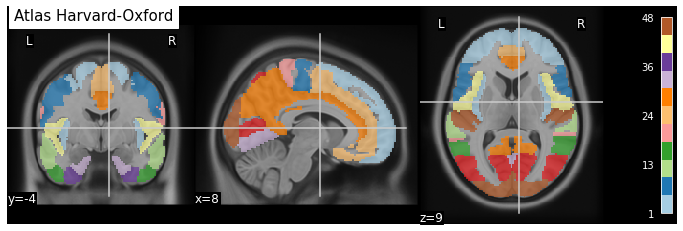

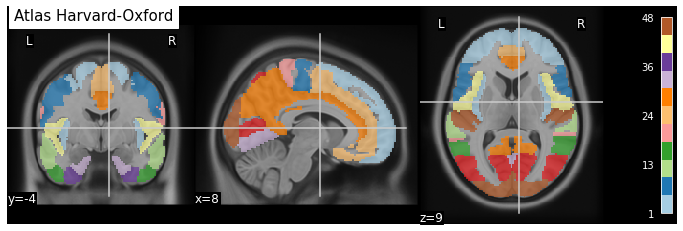

In [1]:
# Download the Harvard-Oxford atlas
from nilearn import datasets

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm').maps
mni = datasets.fetch_icbm152_2009()

# Visualize the atlas
import matplotlib.pyplot as plt
from myst_nb import glue
from nilearn import plotting

fig = plt.figure(figsize=(12, 4))
plotting.plot_roi(atlas,
    bg_img=mni.t1,
    axes=fig.gca(),
    title="Harvard-Oxford Atlas",
    cut_coords=(8, -4, 9),
    colorbar=True,
    cmap='Paired')

glue("harvard-oxford-fig", fig, display=False)

```{glue:figure} harvard-oxford-fig
:figwidth: 800px
:name: "harvard-oxford-fig"

An example of an `atlas` of `anatomical regions`: the `Harvard-Oxford Atlas`.
This figure is generated by `python code` using the [nilearn](https://nilearn.github.io/) library from a public dataset through the function `fetch_atlas_harvard_oxford` ([Nilearn, section 9.2.1: Basic Atlas plotting](https://nilearn.github.io/auto_examples/01_plotting/plot_atlas.html)) {cite:p}`MAKRIS2006155, Frazier2005, DESIKAN2006968, GOLDSTEIN2007935` (click on + to see the code).
```
In order to `automate` the `segmentation` work, it is possible to use an `atlas`, ie a `segmentation` already carried out by a team of researchers.
To do this, they constructed a `map` of the `regions` of `interest` inside a `reference space`, also called {ref}`stereotactic space <stereotactic-tip>`.
There are a variety of `atlases` based on different `anatomical` or `functional criteria`, so it is important to choose the right `atlas` according to the `structures` studied.
In order to adjust the `atlas` to the `data` of a `participant`, the `structural images` of the latter are first {ref}`registered <registration-tip>` in an automated way to the {ref}`stereotaxic space <stereotaxic -tip>` reference.
This `transformation` then makes it possible to adapt the `atlas` to the `anatomy` of each `participant`.

```{admonition} Registration
:class: tip
:name: registration-tip

In order to apply an `atlas` of `brain regions` to an `individual MRI`, or more generally to `match` two `brain images`, it is necessary to `register` this `MRI` on the `stereotactic space` that was used to establish the `regions`.
This `mathematical process` will seek to `deform` the `individual image` in order to `adjust` it to the `stereotactic space`.
This `transformation` can be `affine` (including in particular `translation`, `rotation` and `scaling`) or `non-linear` (`movement` in `any direction` in `space`).
The `objective` of the `registration` is to `increase the level of similarity` between the `images`, but it is also important that the `deformations` are `continuous`.
In other words, `adjacent places` in the `unregistered images` must still be `adjacent` after `registration`.
The `images` below illustrate the effect of different types of `registration`.
They are taken from the software documentation [slicer](https://www.slicer.org/wiki/Documentation:Nightly:Registration:RegistrationLibrary:RegLib_C42), under CC-Attributions Share Alike license.

```{figure} ../../../static/neuroscience/registration_slicer_raw.gif
:figwidth: 400px
:align: left
`Raw images`: two `scans` of the same `participant`, taken during two different `acquisition sessions`.

```{figure} ../../../static/neuroscience/registration_slicer_affine.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
`Images` registered by an `affine transformation process` only.


```{figure} ../../../static/neuroscience/registration_slicer_nonlinear.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
`Images` registered by an `affine transformation` followed by a `non-linear transformation`.


```{figure} ../../../static/neuroscience/registration_slicer_nonlinear_only.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
Visualization of the effects of `non-linear registration` only.
```

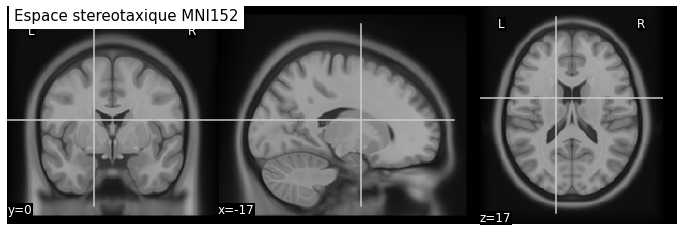

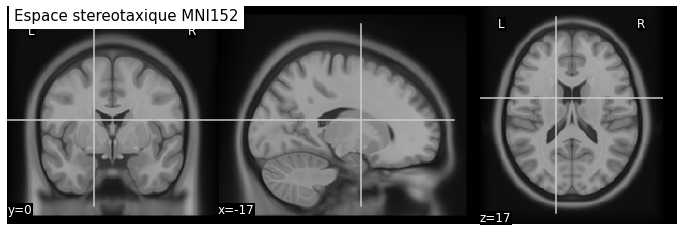

In [2]:
# This code retrieves T1 MRI data
# and generates an image in three planes of cuts

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Download an anatomical image (MNI152 template)
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009()

# Visualize one volume
import matplotlib.pyplot as plt
from myst_nb import glue
from nilearn.plotting import plot_anat

fig = plt.figure(figsize=(12, 4))
plot_anat(
  mni.t1,
  axes=fig.gca(),
  cut_coords=[-17, 0, 17],
  title='MNI152 stereotatic space'
)
glue("mni-template-fig", fig, display=False)

```{admonition} Stereotatic space
:class: tip
:name: stereotatic-tip

In order to define a `reference anatomy`, researchers generally use an `“average” brain`. To achieve this, the `brains` of several dozen individuals are `aligned` with each other, then `averaged` until a `single image` is obtained. If the `registration` worked well, as in the case of the `MNI152 atlas` below, the details of the `neuroanatomy` are `preserved` on `average`.

```{glue:figure} mni-template-fig
:figwidth: 600px
:align: left
`Stereotaxic space` of the `Montreal Neurological Institute` (`MNI`).
This `reference space` was obtained by `averaging` the `brain images` of `152 subjects` after carrying out an `iterative non-linear registration` {cite:p}`Fonov2011-xr`.
```

### Statistical analyzes
```{figure} ../../../static/neuroscience/ledig2018_stats.png
---
width: 400px
name: ledig2018-stats-fig
---
This `figure` illustrates the `differences` in `hippocampal volume` between `cognitively healthy` (`HC`) `participants`, `participants` with `stable` (`sMCI`) or `progressive` (`pMCI`) `mild cognitive impairment`, and `patients` with `Alzheimer-type dementia` (`AD`), in the `ADNI cohort`.
The more severe the clinical symptoms, the greater the likelihood of `Alzheimer's disease`, and the more severe the `stage` of the `disease`.
`Hippocampal atrophy` is clear in `patients` with the most severe symptoms.
Figure taken from {cite:p}`Ledig2018-ai`, under CC-BY license.
```
In order to carry out the `statistical analyses`, the `volume` of each `segmented structure` is first extracted (in $mm^3$).
We can then `statistically compare` the `average volume` between two `groups`, for example, or even test the `association` between `volume` and another variable, such as `age`. In the example of {numref}`ledig2018-stats-fig`, we `compare` the `volume` of the `hippocampus` between different `clinical groups` with different levels of `risk` for `Alzheimer's disease`.

### Quality control
```{figure} ../../../static/neuroscience/artefact-fig.png
---
width: 600px
name: artefact-fig
---
The presence of `metal` or `defective elements` in the `scanner` can cause `artefacts` and `distortions` in the `images` which do not reflect the real `morphology` of the head. Figure of unknown origin, possibly under reserved rights.
```

It is possible to obtain aberrant results in `volumetry`, either because of the presence of `errors` in the `linear` and/or `non-linear registration` steps ({numref}`qc-fail-fig`), or because of `artifacts` during `data acquisition` (presence of `metallic objects`, etc. {numref}`artefact-fig`).
It is important to perform `quality control` to eliminate unusable `images` before proceeding with `statistical analyses`.
Retaining the latter could have `significant impacts` on the results as well as on the conclusions drawn.

```{figure} ../../../static/neuroscience/qc-fail-fig.png
---
width: 600px
name: qc-fail-fig
---
`Registration` can sometimes `fail dramatically`.
Here, the red shape indicates the expected outline of the `brain` and certain `anatomical landmarks`.
The `registered individual MRI` is not at all `aligned` with the expected markers.
Figure by [P. Bellec](), licensed under CC-BY.
```

## VBM

`Voxel-based morphometry` (*voxel-based morphometry* or `VBM`) aims to measure the `volume` of `gray matter` located immediately around a given `voxel`.
This approach is therefore not limited by the need to have clear pre-established boundaries between different `brain structures`.

### Gray matter density

When one generates a `volume measurement` for all the `voxels` of the `brain` using this kind of `technique`, one obtains a `3D map` of the `density` of the `gray matter`.
The main advantages of this approach are its `automated` and `systematic aspects`.
The presence of a person only becomes necessary to check that the procedure has worked correctly: this is the `quality control stage` (or `QC`, for "quality control").
We will also test the `morphology` of the `brain` through all of the `gray matter`.
On the other hand, this technique also has a significant drawback.
Indeed, the large number of measurements generated poses a problem of _multiple comparisons_ when the time comes to perform `statistical analyzes` (see [Chapter 9: Statistical Maps](statistical-maps-chapter)).

### Segmentation

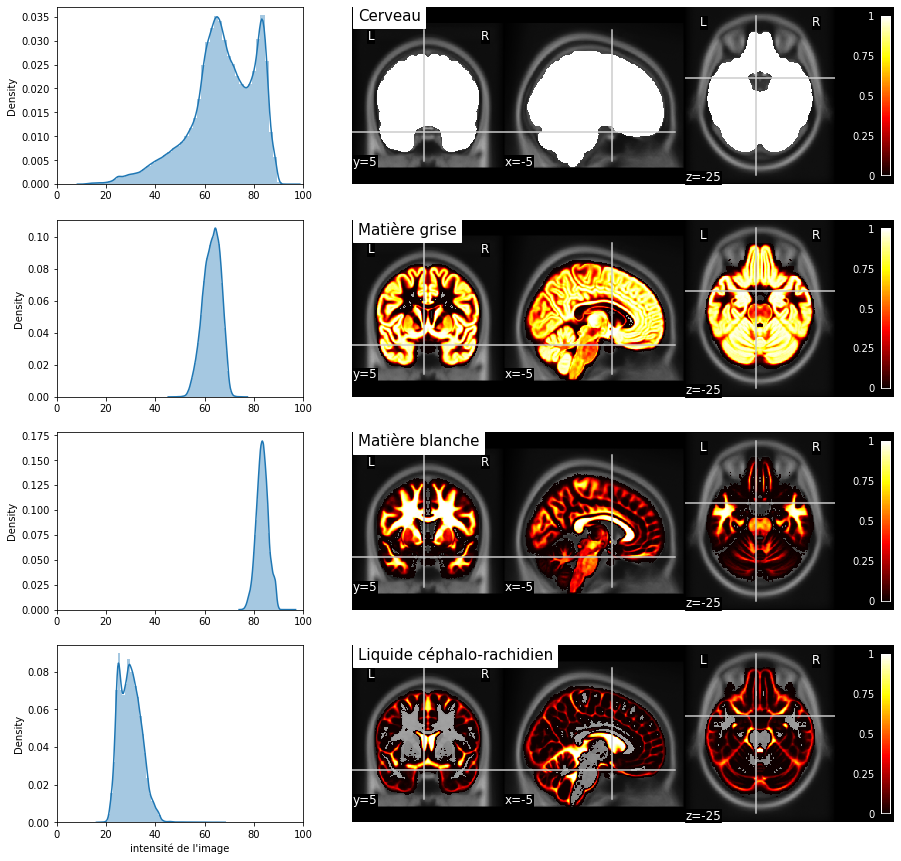

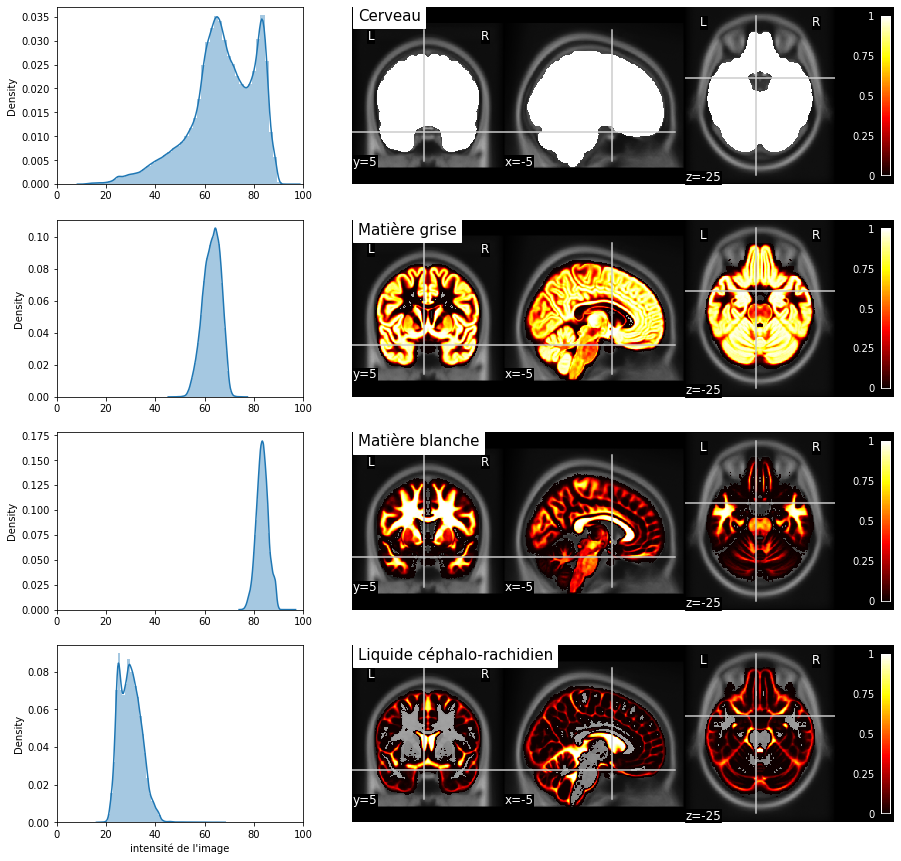

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Download an anatomical scan (MNI152 template)
from nilearn import datasets
mni = datasets.fetch_icbm152_2009()

# Initialize the figure
fig = plt.figure(figsize=(15, 15))

from nilearn.plotting import plot_stat_map
from nilearn.image import math_img
from nilearn.input_data import NiftiMasker

thresh = 0.8
coords = [-5, 5, -25]

# Full brain
ax_plot = plt.subplot2grid((4, 3), (0, 0), colspan=1)
mask_brain = math_img(f"img>{thresh}", img=mni.mask)
val_brain = NiftiMasker(mask_img=mask_brain).fit_transform(mni.t1)
ax = sns.distplot(val_brain, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (0, 1), colspan=2)
plot_stat_map(mni.mask,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Brain - all'
              )

# Gray matter
ax_plot = plt.subplot2grid((4, 3), (1, 0), colspan=1)
mask_gm = math_img(f"img>{thresh}", img=mni.gm)
val_gm = NiftiMasker(mask_img=mask_gm).fit_transform(mni.t1)
ax = sns.distplot(val_gm, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (1, 1), colspan=2)
plot_stat_map(mni.gm,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Brain - gray matter'
              )

# White matter
ax_plot = plt.subplot2grid((4, 3), (2, 0), colspan=1)
mask_wm = math_img(f"img>{thresh}", img=mni.wm)
val_wm = NiftiMasker(mask_img=mask_wm).fit_transform(mni.t1)
ax = sns.distplot(val_wm, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (2, 1), colspan=2)
plot_stat_map(mni.wm,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Brain - white matter'
              )

# CSF
ax_plot = plt.subplot2grid((4, 3), (3, 0), colspan=1)
mask_csf = math_img(f"img>{thresh}", img=mni.csf)
val_csf = NiftiMasker(mask_img=mask_csf).fit_transform(mni.t1)
ax = sns.distplot(val_csf, axlabel="intensité de l'image", norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (3, 1), colspan=2)
plot_stat_map(mni.csf,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Brain - cerebrospinal fluid'
              )

from myst_nb import glue
glue("mni-segmentation-fig", fig, display=False)

```{glue:figure} mni-segmentation-fig
:figwidth: 600px
:name: mni-segmentation-fig
Probabilistic `segmentation` of major `tissue types` and `distribution` of `T1-weighted` values in `"pure" voxels` (`probability` greater than `80%` for a given `tissue type`).
The `T1-weighted image` as well as the `segmentations` correspond to the `MNI152 stereotaxic space` {cite:p}`Fonov2011-xr`.
```

An important step in `VBM` is `segmentation`.
This analysis aims to `categorize` the `types` of `brain tissue` into `different classes` containing `gray matter`, `white matter`, and `cerebrospinal fluid`, among others. A `brain mask` is usually `extracted` to `exclude` the `meninges` as well as the `skull`. We will generally include other types of `tissue` as well, such as `fat`.
A `segmentation algorithm` will then examine the `distribution` of `gray levels` in the `image` (for example, in a `T1-weighted image`) and `estimate` for each `voxel` the proportion of the `voxel` that contains a given `type` of `tissue`.
This proportion is often called the {ref}`partial volume effect <partial-volume-tip>`.
A `voxel` can for example be `assigned` to `80% gray matter` and `20% cerebrospinal fluid`.
The resulting `gray level` could then give a misleading indication of its actual content.

```{admonition} Partial volume effect
:class: tip
:name: partial-volume-tip
It is possible that the `automatic segmentation` returns to us for certain non-desired `tissues values` similar to those of the `gray matter` on the `image` resulting from this step.
Indeed, it is possible that `voxels` located directly on the `junction` between a `white zone` and a `black zone` (for example, on a wall of `white matter` which would border a `ventricle`) have as a resulting `value` rather similar to `gray` `associated` with `gray matter` (`average value` between `white` and `black`).
This kind of `black` and `white` blending effect is called `partial volume` (part of the `voxel` `volume` is `white` while the other part is `black`).
```

### Smoothing

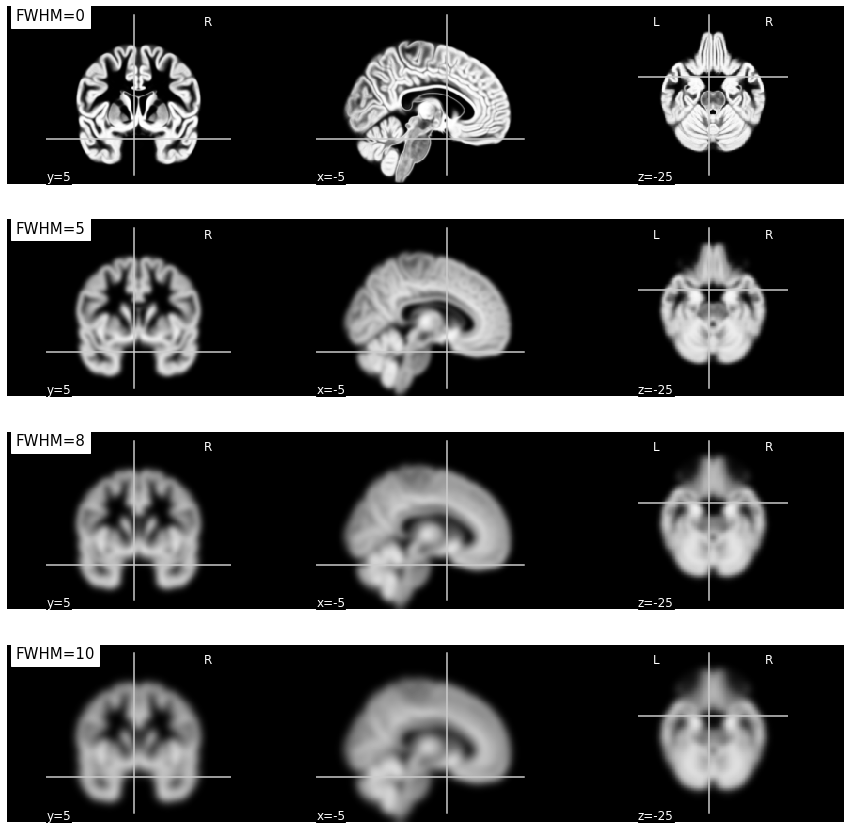

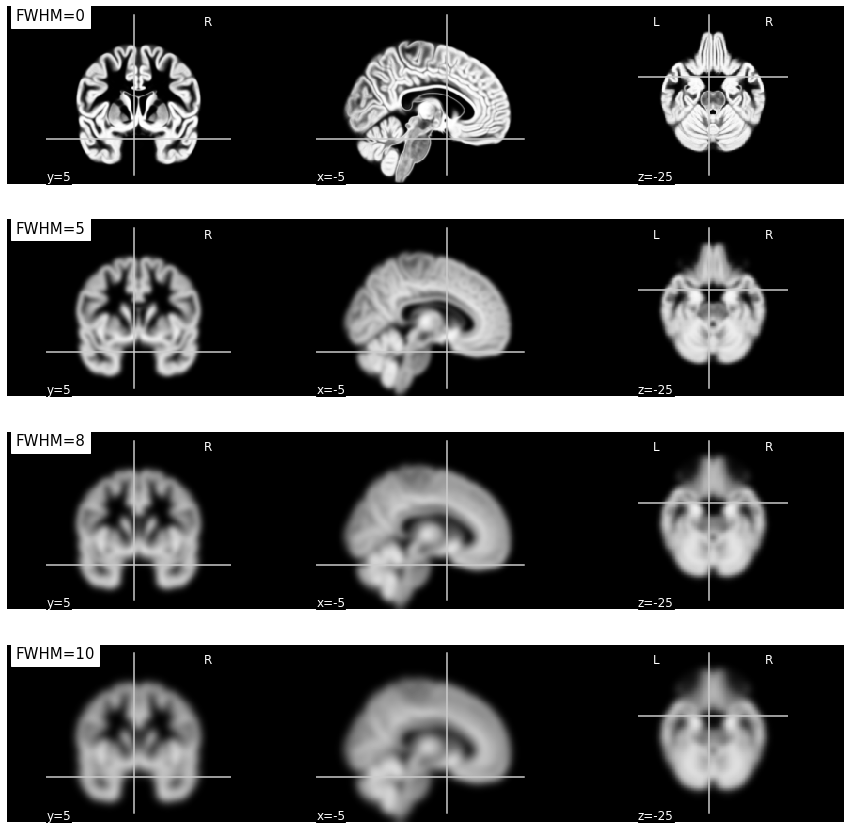

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Download an anatomical image (template MNI152)
from nilearn import datasets
mni = datasets.fetch_icbm152_2009()

# Initialize a figure
fig = plt.figure(figsize=(15, 15))

from nilearn.plotting import plot_anat
from nilearn.image import math_img
from nilearn.input_data import NiftiMasker
from nilearn.image import smooth_img

list_fwhm = (0, 5, 8, 10)
n_fwhm = len(list_fwhm)
coords = [-5, 5, -25]

for num, fwhm in enumerate(list_fwhm):
    ax_plot = plt.subplot2grid((n_fwhm, 1), (num, 0), colspan=1)
    vol = smooth_img(mni.gm, fwhm)
    plot_anat(vol,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title=f'FWHM={fwhm}',
              vmax=1)

from myst_nb import glue
glue("smoothing-fig", fig, display=False)

```{glue:figure} smoothing-fig
:figwidth: 600px
:name: smoothing-fig
Illustration of the impact of `smoothing` on a `gray matter` `density map` in `VBM`.
As the `FWHM` `parameter` increases, the `density measurement` represents an increasingly larger `region` `surrounding` the `voxel`.
This figure is generated by `python code` using the [nilearn](https://nilearn.github.io/) library from a public dataset called MNI152 2009 template {cite:p}`Fonov2011 -xr` (click on `+` to see the code).
```

The next step is *spatial smoothing*.
This consists of adding a `filter` to the `image` that will make it more `blurred`.
In practice, `smoothing` replaces the value associated with each `voxel` by a `weighted average` of its `neighbors`.
As it is a `weighted average`, the original value of the `voxel` is the one that will have the `greatest weight`, but the values ​​of the `voxels` located directly around it will also affect it greatly.
The value of the `weights` follows the `profile` of a `3D Gaussian distribution` (the farther a `neighboring voxel` is from the `voxel of interest`, the less it will affect the value).
It is necessary to perform this step in order to obtain `gray matter` `density values` ​​for `areas` that exceed the `single voxel`, but instead represent the `volume` of a `small region`, centered on the `voxel`.
The `size` of the `region` is controlled by a _full width at half maximum_, or `FWHM` `parameter`, which is measured in `millimeters`.
The larger the `FWHM value`, the larger the `radius` of the `neighborhood` containing the `voxels` which will impact the `smoothing value` of the `voxel` (see {numref}`smoothing-fig`).

### Statistical analyzes

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Job #1, processed 0/2000 permutations (0.00%, 87 seconds remaining)
Job #1, processed 10/2000 permutations (0.50%, 19 seconds remaining)


Job #1, processed 30/2000 permutations (1.50%, 17 seconds remaining)


Job #1, processed 50/2000 permutations (2.50%, 19 seconds remaining)


Job #1, processed 70/2000 permutations (3.50%, 21 seconds remaining)


Job #1, processed 90/2000 permutations (4.50%, 20 seconds remaining)
Job #1, processed 100/2000 permutations (5.00%, 20 seconds remaining)


Job #1, processed 120/2000 permutations (6.00%, 19 seconds remaining)
Job #1, processed 130/2000 permutations (6.50%, 19 seconds remaining)


Job #1, processed 150/2000 permutations (7.50%, 18 seconds remaining)
Job #1, processed 160/2000 permutations (8.00%, 18 seconds remaining)


Job #1, processed 180/2000 permutations (9.00%, 17 seconds remaining)
Job #1, processed 190/2000 permutations (9.50%, 17 seconds remaining)


Job #1, processed 210/2000 permutations (10.50%, 17 seconds remaining)
Job #1, processed 220/2000 permutations (11.00%, 17 seconds remaining)


Job #1, processed 240/2000 permutations (12.00%, 16 seconds remaining)
Job #1, processed 250/2000 permutations (12.50%, 16 seconds remaining)


Job #1, processed 270/2000 permutations (13.50%, 16 seconds remaining)
Job #1, processed 280/2000 permutations (14.00%, 16 seconds remaining)


Job #1, processed 300/2000 permutations (15.00%, 16 seconds remaining)
Job #1, processed 310/2000 permutations (15.50%, 16 seconds remaining)


Job #1, processed 330/2000 permutations (16.50%, 15 seconds remaining)
Job #1, processed 340/2000 permutations (17.00%, 15 seconds remaining)


Job #1, processed 360/2000 permutations (18.00%, 15 seconds remaining)
Job #1, processed 370/2000 permutations (18.50%, 15 seconds remaining)


Job #1, processed 390/2000 permutations (19.50%, 15 seconds remaining)
Job #1, processed 400/2000 permutations (20.00%, 15 seconds remaining)


Job #1, processed 420/2000 permutations (21.00%, 15 seconds remaining)
Job #1, processed 430/2000 permutations (21.50%, 14 seconds remaining)


Job #1, processed 450/2000 permutations (22.50%, 14 seconds remaining)
Job #1, processed 460/2000 permutations (23.00%, 14 seconds remaining)


Job #1, processed 480/2000 permutations (24.00%, 14 seconds remaining)
Job #1, processed 490/2000 permutations (24.50%, 14 seconds remaining)


Job #1, processed 510/2000 permutations (25.50%, 14 seconds remaining)
Job #1, processed 520/2000 permutations (26.00%, 14 seconds remaining)


Job #1, processed 540/2000 permutations (27.00%, 13 seconds remaining)
Job #1, processed 550/2000 permutations (27.50%, 13 seconds remaining)


Job #1, processed 570/2000 permutations (28.50%, 13 seconds remaining)
Job #1, processed 580/2000 permutations (29.00%, 13 seconds remaining)


Job #1, processed 600/2000 permutations (30.00%, 13 seconds remaining)


Job #1, processed 620/2000 permutations (31.00%, 13 seconds remaining)
Job #1, processed 630/2000 permutations (31.50%, 13 seconds remaining)


Job #1, processed 650/2000 permutations (32.50%, 12 seconds remaining)


Job #1, processed 670/2000 permutations (33.50%, 12 seconds remaining)
Job #1, processed 680/2000 permutations (34.00%, 12 seconds remaining)


Job #1, processed 700/2000 permutations (35.00%, 12 seconds remaining)
Job #1, processed 710/2000 permutations (35.50%, 12 seconds remaining)


Job #1, processed 730/2000 permutations (36.50%, 12 seconds remaining)


Job #1, processed 750/2000 permutations (37.50%, 12 seconds remaining)


Job #1, processed 770/2000 permutations (38.50%, 12 seconds remaining)


Job #1, processed 790/2000 permutations (39.50%, 11 seconds remaining)


Job #1, processed 810/2000 permutations (40.50%, 11 seconds remaining)


Job #1, processed 830/2000 permutations (41.50%, 11 seconds remaining)
Job #1, processed 840/2000 permutations (42.00%, 11 seconds remaining)


Job #1, processed 860/2000 permutations (43.00%, 11 seconds remaining)
Job #1, processed 870/2000 permutations (43.50%, 11 seconds remaining)


Job #1, processed 890/2000 permutations (44.50%, 10 seconds remaining)


Job #1, processed 910/2000 permutations (45.50%, 10 seconds remaining)


Job #1, processed 930/2000 permutations (46.50%, 10 seconds remaining)


Job #1, processed 950/2000 permutations (47.50%, 10 seconds remaining)


Job #1, processed 970/2000 permutations (48.50%, 10 seconds remaining)
Job #1, processed 980/2000 permutations (49.00%, 10 seconds remaining)


Job #1, processed 1000/2000 permutations (50.00%, 9 seconds remaining)
Job #1, processed 1010/2000 permutations (50.50%, 9 seconds remaining)


Job #1, processed 1030/2000 permutations (51.50%, 9 seconds remaining)
Job #1, processed 1040/2000 permutations (52.00%, 9 seconds remaining)


Job #1, processed 1060/2000 permutations (53.00%, 9 seconds remaining)
Job #1, processed 1070/2000 permutations (53.50%, 9 seconds remaining)


Job #1, processed 1090/2000 permutations (54.50%, 9 seconds remaining)
Job #1, processed 1100/2000 permutations (55.00%, 8 seconds remaining)


Job #1, processed 1120/2000 permutations (56.00%, 8 seconds remaining)
Job #1, processed 1130/2000 permutations (56.50%, 8 seconds remaining)


Job #1, processed 1150/2000 permutations (57.50%, 8 seconds remaining)
Job #1, processed 1160/2000 permutations (58.00%, 8 seconds remaining)


Job #1, processed 1180/2000 permutations (59.00%, 8 seconds remaining)
Job #1, processed 1190/2000 permutations (59.50%, 8 seconds remaining)


Job #1, processed 1210/2000 permutations (60.50%, 7 seconds remaining)
Job #1, processed 1220/2000 permutations (61.00%, 7 seconds remaining)


Job #1, processed 1240/2000 permutations (62.00%, 7 seconds remaining)
Job #1, processed 1250/2000 permutations (62.50%, 7 seconds remaining)


Job #1, processed 1270/2000 permutations (63.50%, 7 seconds remaining)
Job #1, processed 1280/2000 permutations (64.00%, 7 seconds remaining)


Job #1, processed 1300/2000 permutations (65.00%, 6 seconds remaining)
Job #1, processed 1310/2000 permutations (65.50%, 6 seconds remaining)


Job #1, processed 1330/2000 permutations (66.50%, 6 seconds remaining)
Job #1, processed 1340/2000 permutations (67.00%, 6 seconds remaining)


Job #1, processed 1360/2000 permutations (68.00%, 6 seconds remaining)
Job #1, processed 1370/2000 permutations (68.50%, 6 seconds remaining)


Job #1, processed 1390/2000 permutations (69.50%, 5 seconds remaining)
Job #1, processed 1400/2000 permutations (70.00%, 5 seconds remaining)


Job #1, processed 1420/2000 permutations (71.00%, 5 seconds remaining)
Job #1, processed 1430/2000 permutations (71.50%, 5 seconds remaining)


Job #1, processed 1450/2000 permutations (72.50%, 5 seconds remaining)
Job #1, processed 1460/2000 permutations (73.00%, 5 seconds remaining)


Job #1, processed 1480/2000 permutations (74.00%, 5 seconds remaining)
Job #1, processed 1490/2000 permutations (74.50%, 4 seconds remaining)


Job #1, processed 1510/2000 permutations (75.50%, 4 seconds remaining)
Job #1, processed 1520/2000 permutations (76.00%, 4 seconds remaining)


Job #1, processed 1540/2000 permutations (77.00%, 4 seconds remaining)


Job #1, processed 1560/2000 permutations (78.00%, 4 seconds remaining)
Job #1, processed 1570/2000 permutations (78.50%, 4 seconds remaining)


Job #1, processed 1590/2000 permutations (79.50%, 4 seconds remaining)


Job #1, processed 1610/2000 permutations (80.50%, 3 seconds remaining)


Job #1, processed 1630/2000 permutations (81.50%, 3 seconds remaining)


Job #1, processed 1650/2000 permutations (82.50%, 3 seconds remaining)


Job #1, processed 1670/2000 permutations (83.50%, 3 seconds remaining)
Job #1, processed 1680/2000 permutations (84.00%, 3 seconds remaining)


Job #1, processed 1700/2000 permutations (85.00%, 2 seconds remaining)
Job #1, processed 1710/2000 permutations (85.50%, 2 seconds remaining)


Job #1, processed 1730/2000 permutations (86.50%, 2 seconds remaining)
Job #1, processed 1740/2000 permutations (87.00%, 2 seconds remaining)


Job #1, processed 1760/2000 permutations (88.00%, 2 seconds remaining)
Job #1, processed 1770/2000 permutations (88.50%, 2 seconds remaining)


Job #1, processed 1790/2000 permutations (89.50%, 2 seconds remaining)
Job #1, processed 1800/2000 permutations (90.00%, 1 seconds remaining)


Job #1, processed 1820/2000 permutations (91.00%, 1 seconds remaining)
Job #1, processed 1830/2000 permutations (91.50%, 1 seconds remaining)


Job #1, processed 1850/2000 permutations (92.50%, 1 seconds remaining)
Job #1, processed 1860/2000 permutations (93.00%, 1 seconds remaining)


Job #1, processed 1880/2000 permutations (94.00%, 1 seconds remaining)
Job #1, processed 1890/2000 permutations (94.50%, 1 seconds remaining)


Job #1, processed 1910/2000 permutations (95.50%, 0 seconds remaining)
Job #1, processed 1920/2000 permutations (96.00%, 0 seconds remaining)


Job #1, processed 1940/2000 permutations (97.00%, 0 seconds remaining)
Job #1, processed 1950/2000 permutations (97.50%, 0 seconds remaining)


Job #1, processed 1970/2000 permutations (98.50%, 0 seconds remaining)
Job #1, processed 1980/2000 permutations (99.00%, 0 seconds remaining)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.6s finished


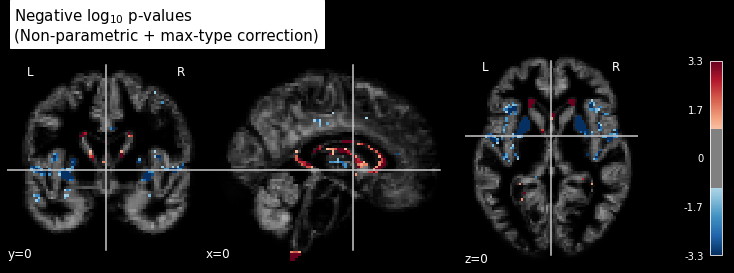

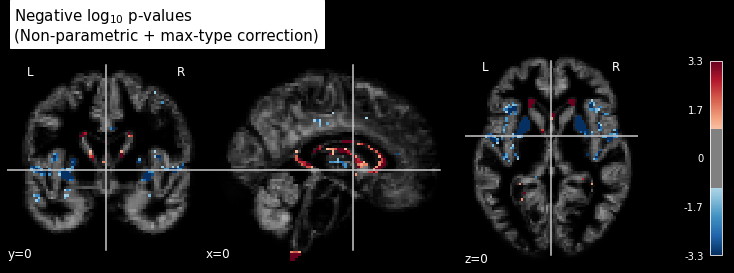

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.image import get_data

n_subjects = 100  # more subjects requires more memory

# Load data
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects=n_subjects)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)

# Prepare mask
nifti_masker = NiftiMasker(
    standardize=False,
    smoothing_fwhm=2,
    memory='nilearn_cache')  # cache options

# Normalize data
gm_maps_masked = nifti_masker.fit_transform(gray_matter_map_filenames)

from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=.01)

gm_maps_thresholded = variance_threshold.fit_transform(gm_maps_masked)
gm_maps_masked = variance_threshold.inverse_transform(gm_maps_thresholded)
data = variance_threshold.fit_transform(gm_maps_masked)

# Massively univariate regression model
from nilearn.mass_univariate import permuted_ols
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age, data,  # + intercept as a covariate by default
    n_perm=2000,  # 1,000 in the interest of time; 10000 would be better
    verbose=1, # display progress bar
    n_jobs=1)  # can be changed to use more CPUs
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(signed_neg_log_pvals))

# Visualize result
threshold = -np.log10(0.1)  # 10% corrected

fig = plt.figure(figsize=(10, 3), facecolor='k')
bg_filename = gray_matter_map_filenames[0]
cut_coords = [0, 0, 0]
display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        cut_coords=cut_coords,
                        figure=fig)
title = ('Negative $\\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)
plt.show()

from myst_nb import glue
glue("vbm-fig", fig, display=False)

```{glue:figure} vbm-fig
:figwidth: 600px
:name: vbm-fig
`Linear regression` in `VBM`.
We are testing here the effect of `age` on a group of `participants` (`N=50`) from the `OASIS database`.
The $-\log_{10}(p)$ `significance` of the `age effect` is superimposed on a `gray matter density image`.
This figure is adapted from a [Nilearn tutorial](https://nilearn.github.io/auto_examples/02_decoding/plot_oasis_vbm.html#sphx-glr-auto-examples-02-decoding-plot-oasis-vbm-py).
```

In order to be able to compare `gray matter` `density values` between `participants`, we use the same `non-linear` {ref}`registration-tip>` procedure as for `automatic volumetry`.
Unlike `manual volumetry`, where each `volume` under study is `delimited` so as to represent the same `structure of interest`, the `registration` used in `VBM` is not linked to a particular `structure`.
Once the `density maps` have been readjusted in the `reference stereotactic space`, `statistical tests` can be carried out at each `voxel`.
In the example above, we test the effect of `age` on `gray matter`.
It is generally this kind of `image` that will subsequently be inserted into scientific publications.

### Quality control
```{figure} ./morphometrie/segmentation-error-volume-fig.png
---
width: 600px
name: segmentation-error-volume-fig
---
Left image: `Individual T1-weighted MRI`.
Right image: `gray matter` and `white matter` classification generated by the software [ANTS](http://stnava.github.io/ANTs/).
Note how `white matter` near the `gyrus` is erroneously classified as `gray matter`.
CC Attribution licensed image from Klein et al., 2017 {cite:p}`Klein2017-zh`.
```

As with any automated operation, there is always the possibility of error in `VBM`.
It is therefore necessary to provide a `quality control` step in order to ensure that there have been no aberrations which have been introduced into the processing steps.
We have already discussed `artefacts` in the data as well as `registration` problems.
The `VBM` is also very sensitive to errors in the `segmentation` step.
It is therefore possible to lose certain `structures` for which the `contrast` between the `white matter` and the `gray matter` is not significant enough for the `algorithm` to succeed in classifying them effectively.
For this kind of `structure`, it is important to add *a priori* (additional rules or conditions) in order not to lose them.
It is also possible to correct this part of the `segmentation` `manually` or to exclude the `data` of certain `participants`.

## Surface analyses

### Surface extraction
```{figure} ./morphometrie/surface-fig.png
---
width: 600px
name: surface-fig
---
Illustration of the position of the `pial surface` and the inner `surface`.
Top: `T1-weighted MRI` slice with automatically estimated `areas`.
Bottom: schematic illustration of the `surfaces`.
Figure adapted by [P. Bellec]() from `figures` in the `article` by Klein et al., 2017 {cite:p}`Klein2017-zh` under CC-BY license.
```

`Cortical surface analyzes` differ from the previously outlined `morphometry techniques` in that they exploit the `ribbon` that `gray matter` forms by extending across the `surface` of `white matter`.
In addition to the `segmentation` and `registration steps` that we saw previously, we will use here an `algorithm` that will detect the *pial surface*, at the border between the `gray matter` and the `cerebrospinal fluid`, and the *pial surface*, at the `border` between the `gray matter` and the `cerebrospinal fluid`, and the *pial surface interior* (also called *white surface*), at the `border` between `white matter` and `gray matter`.
It will also be necessary, as for `VBM`, to extract a `mask` from the `brain` by eliminating `structures` that do not belong to the `cortex` (`cranial box`, `adipose tissue`, `meninges`, `cerebrospinal fluid`, etc.).
This kind of analysis produces `surfaces` that can be viewed as `3D objects`, resulting in [magnificent interactive visualizations](https://gallantlab.org/huth2016/).

```{admonition} Balloon growth
:class: tip
To estimate the position of the `pial` and `inner surfaces`, a `virtual balloon` is placed in the center of each of the `hemispheres` of the `brain`.
We then model `physical constraints` at the boundary between `white matter` and `gray matter` (`internal surface`).
We then proceed to `"inflate"` this `balloon` until it matches the `border` of the `internal surface` as best as possible (until the `balloon` is `inflated` and occupies all the `space` in the `cavity` and that it matches all the `curves` of the wall).
It is also possible to do the reverse procedure.
We could indeed generate a `virtual balloon` around each of the `hemispheres` and `"deflate"` them until they match the `contours` of the `borders` delimited by the `physical constraints`.
When one of the `borders` (`internal surface` or `pial surface`) is `delimited`, it is possible to continue the `inflation`/`deflation` procedure in order to obtain the second `surface`.
```

```{admonition} Attention
:class: caution attention
:name: controle-qualite-attention
`Surface extraction` techniques such as those proposed by the [FreeSurfer]() software are costly in terms of `computational resources`.
Generating a `surface` from a `structural MRI` can take up to `10 hours` on a standard computer.
```

### Thickness, area and volume
```{figure} ./morphometrie/thickness-fig.png
---
width: 600px
name: thickness-fig
---
Illustration of `area`, `thickness` and `volume measurements` of the `cortex`.
Figure adapted by [P. Bellec]() from figures in the article by Winkler et al., 2018 {cite:p}`Winkler2018-wq` under CC-BY license.
```

The `reconstruction` of the `geometry` of the `surface` will make it possible to `decompose` the `volume` of the `gray matter` into a `local thickness`, and a `local surface`.
These two `properties` can now be studied separately, unlike what is possible with a `VBM analysis`, and have been shown to be independently linked to different `neurological` and `psychiatric conditions`.
To do this, instead of analyzing the content of `volume units` (`voxels`), as was the case for `VBM`, we will use here the analysis of the content of `surface units`: the **vertices** .

```{admonition} Attention
:class: caution attention
:name: surface-warning
Who says `cortical surface`, also implies that the `subcortical structures` are left aside.
For `structures` buried in the `cranium`, such as the `thalami` and `basal ganglia`, `surface analysis` must be combined with `automatic volumetry` (for `subcortical structures`).
```

### Statistical analyses

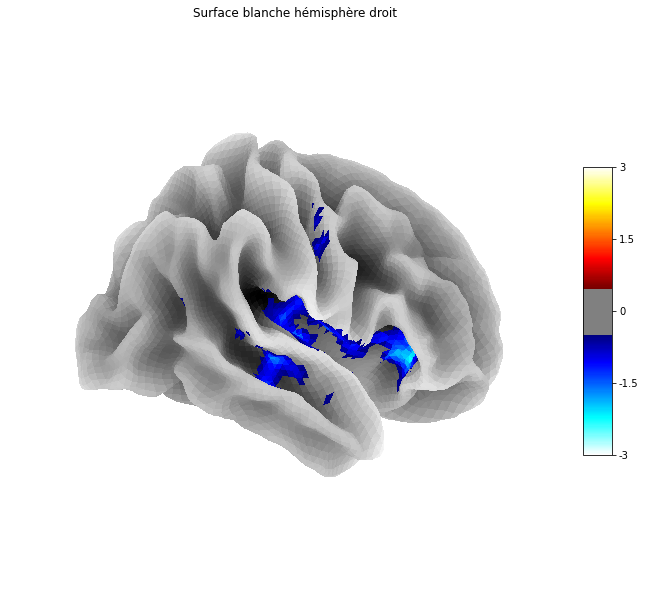

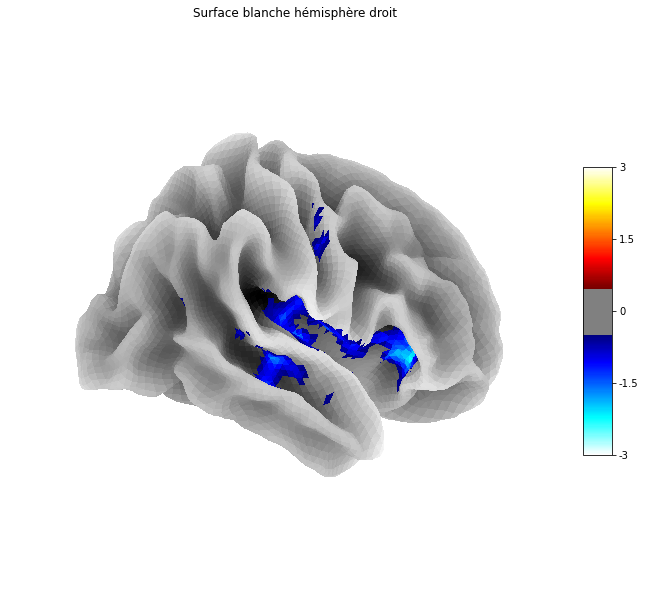

In [6]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()

from nilearn.plotting import plot_surf_stat_map
from nilearn.surface import vol_to_surf
fig = plt.figure(figsize=(10, 8))

texture = vol_to_surf(signed_neg_log_pvals_unmasked, fsaverage.pial_right)

plot_surf_stat_map(fsaverage.white_right, texture, hemi='right', view='lateral',
                            title='Right hemisphere white surface', colorbar=True,
                            threshold=0.5, bg_map=fsaverage.sulc_right,
                            figure=fig)

from myst_nb import glue
glue("surf-stat-fig", fig, display=False)

```{glue:figure} surf-stat-fig
:figwidth: 700px
:name: surf-stat-fig
Projection of the `statistical map` presented in {numref}`vbm-fig` onto the `cortical surface space` `fsaverage`. This figure is adapted from a [Nilearn tutorial](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_surf_stat_map.html).
```

`Statistical analyzes` work exactly the same way for `surface analyzes` as for `VBM`.
But instead of doing a `statistical test` at the level of each of the `voxels` (as in `VBM`), we now do a test for each of the `vertices` (`surface`).

### Quality control
```{figure} ./morphometrie/segmentation-error-surface-fig.png
---
width: 600px
name: segmentation-error-surface-fig
---
Left image: `Individual T1-weighted MRI`.
Right image: `Automated surface extraction`.
Note that the `pial surface` does not properly follow the interface between `gray matter` and `cerebrospinal fluid` where indicated.
CC Attribution licensed image from Klein et al., 2017 {cite:p}`Klein2017-zh`.
```
The `surface extraction technique` is not robust to `partial volume effects`.
One could indeed have a `surface` which does not go to the bottom of a `sulcus`, or when the `gyri` are very close together, which does not even enter inside the `sulcus`.
The result of these two types of error, which are possible both at the level of the `pial surface` and the `internal surface`, will be a strong `localized overestimation` of the `cortical thickness`.
This is why it is desirable to carry out frequent `quality checks` on all `images` and to correct `segmentation errors` by hand, or else to exclude the `data` of certain `participants`.

## Conclusion
This chapter of the course introduced you to the different families of `computational morphology techniques` that can be used with `data` `acquired` in `anatomical magnetic resonance imaging`.
Several key `image analysis techniques` were discussed and some `statistical models` started to be introduced.


## References

```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 3.1
:class: dropdown

Choose the best answer and explain why.
`Individual T1 MRI` `data` are...
  1. A `3D` `image` of a `brain`.
  2. Dozens of `2D sagittal images` of a `brain`.
  3. Hundreds of `axial`, `coronal` and `sagittal 2D images` of a `brain`.
  4. All of the above.
```

```{admonition} Exercice 3.2
:class: dropdown

We want to compare the `mean volume` of the right `putamen` between `neurotypical` `participants` and `participant`s on the `autism spectrum`.
Two alternative methods are considered for this: `manual volumetry` and `VBM analysis`.
For each of these `techniques`, name a strength and a weakness in relation to the objectives of the study.
```

```{admonition} Exercice 3.3
:class: dropdown

For each of the following statements, specify whether the statement is true or false and explain your choice.
  - `T1 MRI` `data` needs to be `realigned` to study `brain morphology` at the `population level`.
  - `"Raw" MRI` `data` (before the `pre-processing` step) cannot be used to study `morphometry`.
  - In `VBM`, `spatial smoothing` is important, even for an `individual analysis`.
```

```{admonition} Exercice 3.4
:class: dropdown

For each of the following statements, specify whether the statement is true or false and explain your choice.
  - The `movements` of a research `participant` can create noise in a `VBM map`.
  - The presence of `metal` can create noise and distortions in a `VBM card`.
  - A hole in a `VBM brain map` necessarily means that there is a hole in the `participant`'s `brain`.
```

```{admonition} Exercice 3.5
:class: dropdown

While checking her `structural` `data`, a researcher realizes that one of her research `participant`s has twice the normal `brain volume`!
However, this `participant`'s `skull` appeared normal.
Offer an explanation.
```

```{admonition} Exercice 3.6
:class: dropdown

We wish to make a comparison between the `quantity` of `gray matter` present at the level of the `post-central sulcus` and that contained in the `precentral sulcus`, on average, over a `population`.
Two alternative methods are considered for this: a `VBM` analysis or an analysis of the `cortical thickness` (`surface` analysis).
Which technique would you choose and why?
```

```{admonition} Exercice 3.7
:class: dropdown

Data from one research `participant` is of poor `quality` and `gray matter` `segmentation` is imprecise.
For each of the following combinations of choices, which technique would you choose and why?
  - `VBM` vs `manual volumetrics`?
  - `VBM` vs `surface` analysis?
```

```{admonition} Exercice 3.8
:class: dropdown

We have seen in class some examples of `cerebral anatomical structures`.
Let's do a little review...
Using the `visualization window` below (also accessible on this [course web page](morphometrie.html#exercises)), give the `coordinates` (`x`, `y`, or `z`) where you can see...
  - a `sagittal` section showing the `corpus callosum`.
  - a `coronal` section showing the `corpus callosum`.
  - an `axial` section containing `ventricles`.
  - an `axial` section with the `central sulcus`.

For a refresher on the different types of `brain slices`, please refer to {ref}`Chapter 1: Brain Maps <slices-tip>`.
```


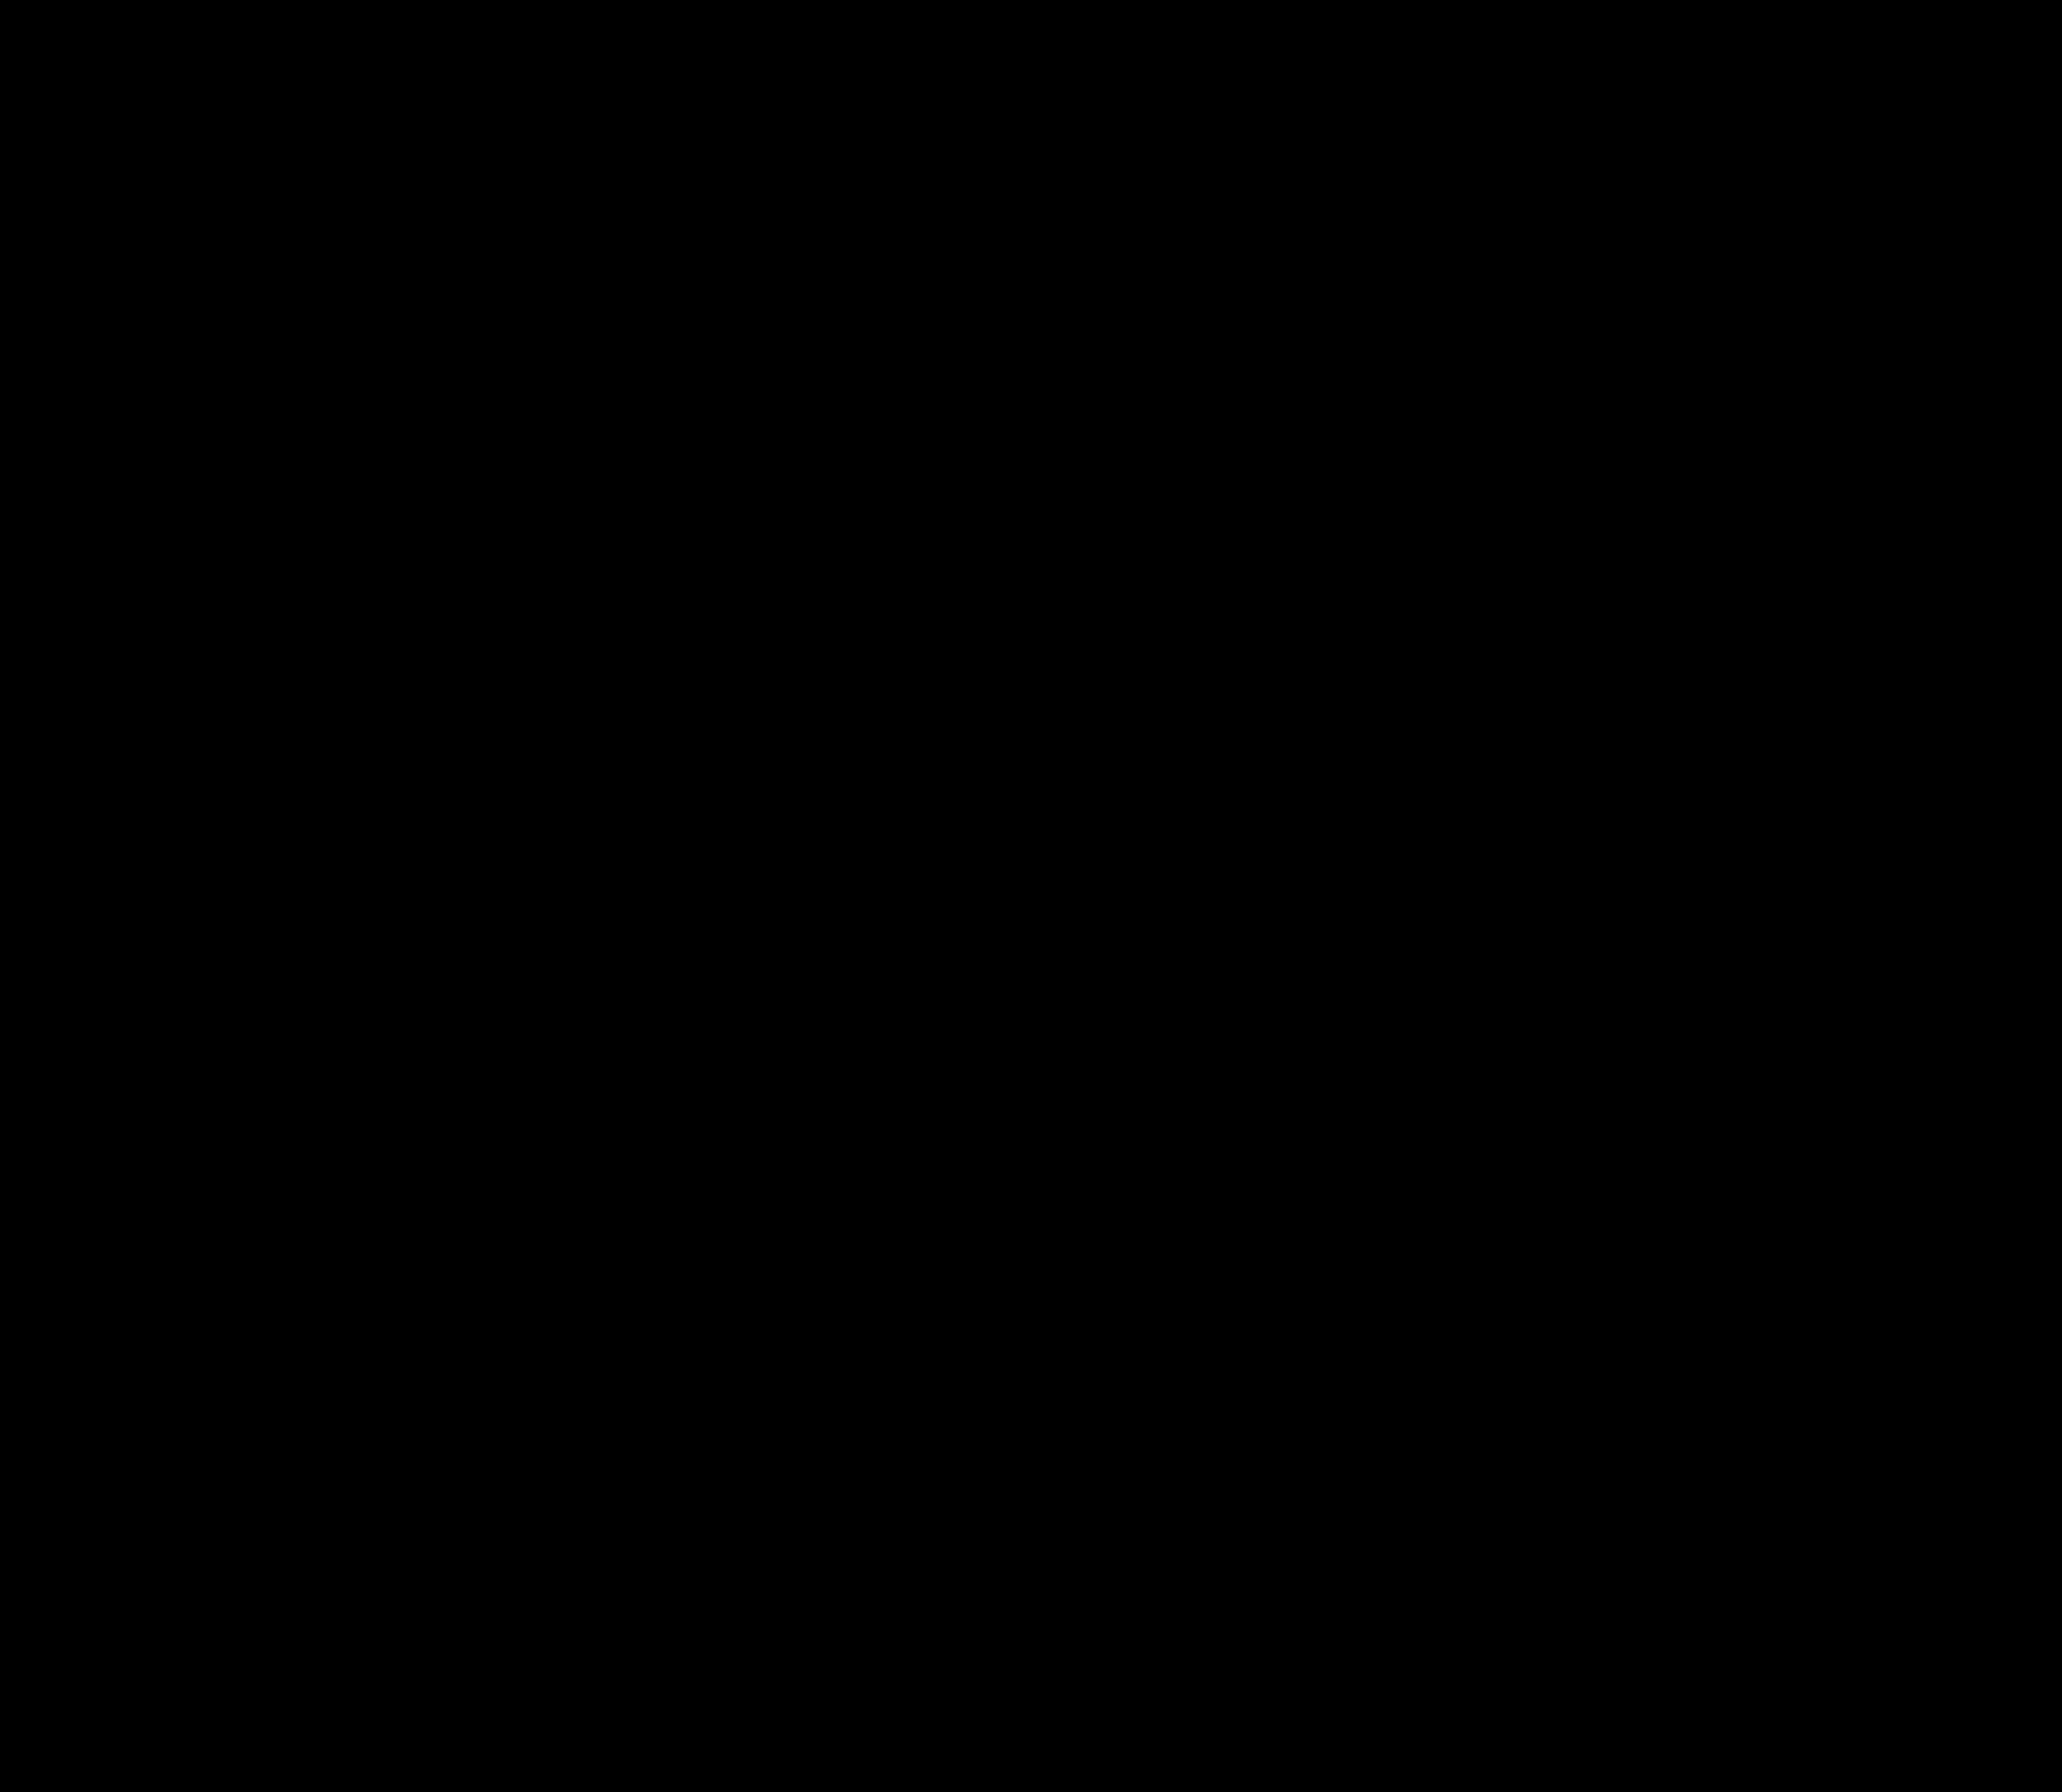
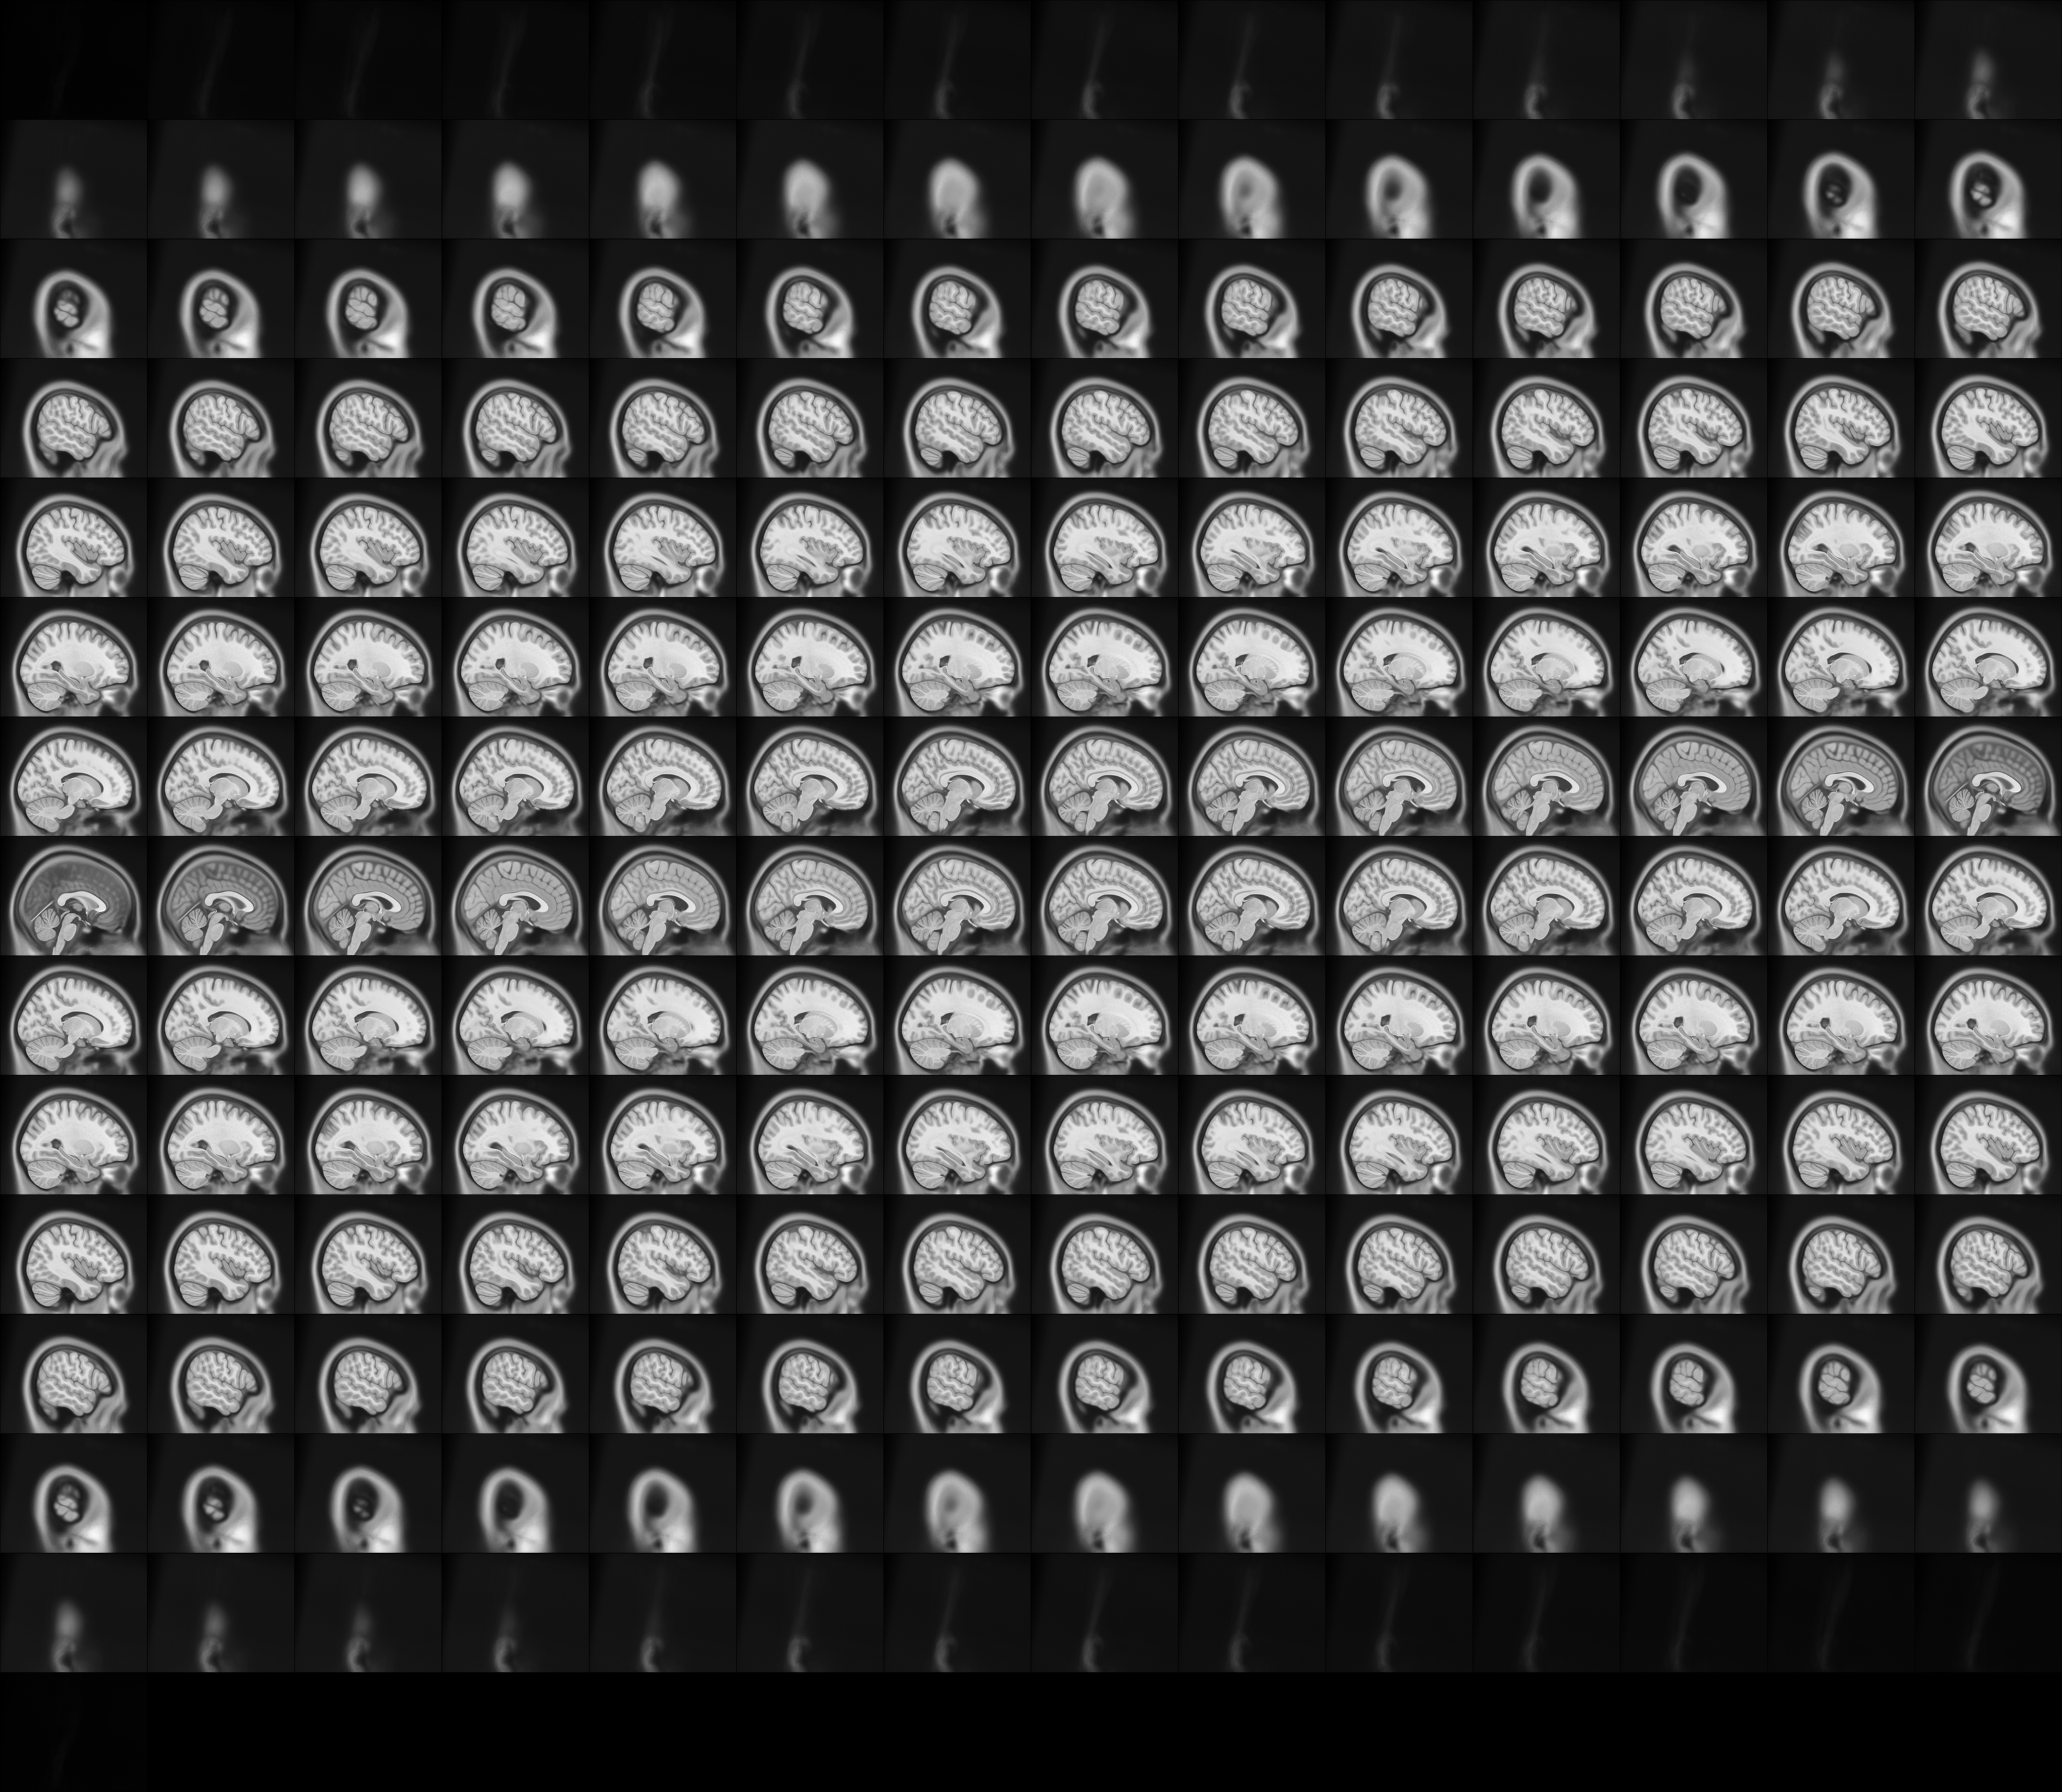

In [7]:
# Ce code récupère des données IRM T1
# et génère une image dans trois plans de coupes

# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

# Télécharge un scan anatomique (template MNI152)
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009()

# Visualise le volume cérébral
from nilearn.plotting import view_img

view_img(
    mni.t1,
    bg_img=None,
    black_bg=True,
    cut_coords=[-17, 0, 17],
    title='IRM pondérée en T1',
    cmap='gray',
    symmetric_cmap=False
)

```{admonition} Exercice 3.9
:class: dropdown

To answer the questions in this exercise, first read the article *Development of cortical thickness and surface area in autism spectrum disorder* by Mensen et al. (published in 2017 in the journal *Neuroimage: Clinical*, volume 13, pages 215 at 222).
It is freely available at this [address](https://www.sciencedirect.com/science/article/pii/S2213158216302406).
The following questions require short-answer answers.
 - What type(s) of `participant`(s) were recruited in this study?
 - What is the `main objective` of the study?
 - What are the `inclusion` and `exclusion` criteria?
 - What `neuroimaging` technique is used? Is it a `structural` or `functional technique`?
 - What type of `image acquisition sequence` is used? List the `parameters`.
 - Does `image processing` include a `registration` step(s)? If yes, what type(s)?
 - Do the researchers have a `quality control` procedure in place? If yes, summarize this procedure.
 - Are the `regions of interest` (`ROI`) defined? If yes, in what way? With which `atlas`? How many are there?
 - What `morphological measures` are used for each `region`?
 - Which figure (or table) meets the `main objective` of the study?
```